In [1]:
import numpy as np
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [ ]:
from model.__model import train, RMSELoss, GlobalLSTM

model = GlobalLSTM(hidden_size=256)
loss_func = RMSELoss()
model = train(model, x_train, y_train, loss_func, epochs=500)

epoch: 1, loss: 0.10499287396669388, time: 3.553032398223877
epoch: 2, loss: 0.05705791339278221, time: 3.4356863498687744
epoch: 3, loss: 0.044096771627664566, time: 3.3920505046844482
epoch: 4, loss: 0.03604292497038841, time: 3.429745674133301
epoch: 5, loss: 0.031047850847244263, time: 3.49320387840271
epoch: 6, loss: 0.027486030012369156, time: 3.2279059886932373
epoch: 7, loss: 0.02533257193863392, time: 3.4585084915161133
epoch: 8, loss: 0.023775290697813034, time: 3.516453266143799
epoch: 9, loss: 0.022927919402718544, time: 3.329618215560913
epoch: 10, loss: 0.023672688752412796, time: 3.388010263442993
epoch: 11, loss: 0.021688761189579964, time: 3.4612057209014893
epoch: 12, loss: 0.02161685936152935, time: 3.6233534812927246
epoch: 13, loss: 0.021016251295804977, time: 3.4382357597351074
epoch: 14, loss: 0.020833676680922508, time: 3.350468397140503
epoch: 15, loss: 0.019584327936172485, time: 3.2938170433044434
epoch: 16, loss: 0.02015121839940548, time: 3.647838830947876


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model(x_test)

for i in range(6):
    print(np.corrcoef(y_test[i,:], y_pred[i,:]))
    print(r2_score(y_test[i,:], y_pred[i,:]))
    print(np.sqrt(mean_squared_error(y_test[i, :], y_pred[i,:])))

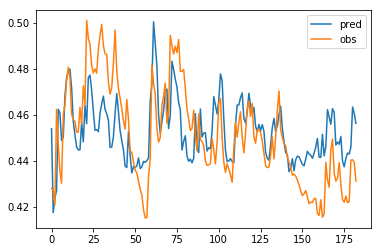

In [11]:
import matplotlib.pyplot as plt

plt.plot(y_pred[5])
plt.plot(y_test[5])
plt.legend(['pred','obs'])

In [5]:
from model.__model import GlobalLSTM
from model.__train_model import train, rmse_loss

model = GlobalLSTM(256)

model = train(model,
      X,
      y,
      loss_func=rmse_loss,
      epochs=10,
      batch_size=6,
      rho=30)

tf.Tensor(104.45856, shape=(), dtype=float32)
epoch 0: MSE is 0.4541676342487335, cost time: 12.646243333816528
tf.Tensor(83.8357, shape=(), dtype=float32)
epoch 1: MSE is 0.36450305581092834, cost time: 12.60050654411316
tf.Tensor(58.866566, shape=(), dtype=float32)
epoch 2: MSE is 0.25594159960746765, cost time: 12.617806911468506
tf.Tensor(35.177895, shape=(), dtype=float32)
epoch 3: MSE is 0.15294736623764038, cost time: 12.640567779541016
tf.Tensor(27.78847, shape=(), dtype=float32)
epoch 4: MSE is 0.12081943452358246, cost time: 12.84595274925232
tf.Tensor(26.729073, shape=(), dtype=float32)
epoch 5: MSE is 0.116213358938694, cost time: 12.836087942123413
tf.Tensor(25.74283, shape=(), dtype=float32)
epoch 6: MSE is 0.11192534863948822, cost time: 12.669172286987305
tf.Tensor(25.047062, shape=(), dtype=float32)
epoch 7: MSE is 0.1089002713561058, cost time: 12.74332308769226
tf.Tensor(24.0968, shape=(), dtype=float32)
epoch 8: MSE is 0.10476869344711304, cost time: 12.565914630889

In [12]:
x_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

x_test = np.concatenate([x_test,y_test], axis=-1)


x_test = np.transpose(x_test.reshape(184, 6, 7)[:-1], [1,0,2])
y_test = np.transpose(y_test.reshape(184, 6, 1)[1:], [1,0,2])

x_test.shape
#y_test.shape
np.save('x_test.npy', x_test)
np.save('y_test.npy', y_test)

In [4]:
model.train(mode=False)
import torch
x_test = torch.Tensor(x_test).float().cuda()
#x_test = torch.from_numpy(x_test_)
yp = model(x_test)

In [5]:
m = np.array(yp.cuda().data.cpu().numpy())

In [6]:
from sklearn.metrics import r2_score, mean_squared_error
for i in range(6):
    print(r2_score(y_test[i,:], m[i,:]))
    print(np.sqrt(mean_squared_error(y_test[i, :], m[i,:])))

0.5688472301594292
0.011681936308393818
0.598348267244182
0.014940405702957366
0.6797533918444221
0.011115816156268851
0.32518909213192093
0.017108725012636463
0.7068575821064038
0.01107208657374262
0.6825446798301638
0.011797544557035109


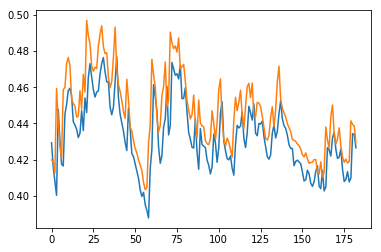

In [10]:
import matplotlib.pyplot as plt

plt.plot(m[3])
#plt.plot(yp[3])

plt.plot(y_test[3])
#plt.plot(y_test[5])


In [5]:
# inputs
inputs = tf.keras.layers.Input(shape=(10,1))
x = tf.keras.layers.LSTM(units=16, return_sequences=True)(inputs)
x = tf.keras.layers.LSTM(units=1, return_sequences=False)(x)
#x = tf.keras.layers.Dense(1)(x)

# build
model = tf.keras.models.Model(inputs=inputs, outputs=x)


def keras_train(model, X, y, batch_size, epochs):

    # TODO: split spatiotemporal or temporal model modes

    N_sample, Nt, Nlat, Nlon, Nf = X.shape
    X = X.reshape(-1, Nt*Nf)
    y = y.reshape(-1, 1)

    # remove nan grids
    idx_y = np.unique(np.where(~np.isnan(y))[0])
    X = X[idx_y, :]
    y = y[idx_y, :]

    idx_nan_x = np.unique(np.where(np.isnan(X))[0])
    X = np.delete(X, idx_nan_x, axis=0)
    y = np.delete(y, idx_nan_x, axis=0)

    X, y = X.reshape(-1, Nt, Nf), y.reshape(-1, 1)

    model.compile(loss='mse', optimizer='adam')
    model.fit(X, y, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    #model.save(save_folder)

    return model

model.compile(loss='mse', optimizer='adam')
model.fit(x_train[:,:,0,0,-1][:,:,np.newaxis], y_train[:,0,0,0,:], batch_size=16, epochs=100)

#model = keras_train(model, x_train[:,:,0,0,-1][:,:,np.newaxis], y_train[:,0,0,0,:], batch_size=16, epochs=100)

Epoch 1/100
45/45 [==============================] - 3s 20ms/step - loss: 0.0858
Epoch 2/100
45/45 [==============================] - 1s 21ms/step - loss: 0.0010
Epoch 3/100
45/45 [==============================] - 1s 21ms/step - loss: 3.1432e-04
Epoch 4/100
45/45 [==============================] - 1s 21ms/step - loss: 3.0667e-04
Epoch 5/100
45/45 [==============================] - 1s 21ms/step - loss: 3.0504e-04
Epoch 6/100
45/45 [==============================] - 1s 21ms/step - loss: 3.0222e-04
Epoch 7/100
45/45 [==============================] - 1s 21ms/step - loss: 2.9948e-04
Epoch 8/100
45/45 [==============================] - 1s 21ms/step - loss: 3.0062e-04
Epoch 9/100
45/45 [==============================] - 1s 21ms/step - loss: 2.9812e-04
Epoch 10/100
45/45 [==============================] - 1s 21ms/step - loss: 3.0141e-04
Epoch 11/100
45/45 [==============================] - 1s 21ms/step - loss: 2.9626e-04
Epoch 12/100
45/45 [==============================] - 1s 21ms/step - lo

In [8]:
from sklearn.metrics import r2_score, mean_squared_error

for i in range(x_test.shape[2]):
    for j in range(x_test.shape[3]):

        y_pred = model.predict(x_test[:, :, 0, 0, -1])
        print(r2_score(np.squeeze(y_test[:, :, 0, 0, :]), y_pred))
        print(np.sqrt(mean_squared_error(y_test[:,0,0,0], y_pred)))
        print(np.corrcoef(y_test[:,0,0,0, 0], y_pred[:,0]))

0.039478831717477236
0.017160191069234054
[[1.         0.41652528]
 [0.41652528 1.        ]]
0.039478831717477236
0.017160191069234054
[[1.         0.41652528]
 [0.41652528 1.        ]]
0.039478831717477236
0.017160191069234054
[[1.         0.41652528]
 [0.41652528 1.        ]]
0.039478831717477236
0.017160191069234054
[[1.         0.41652528]
 [0.41652528 1.        ]]
0.039478831717477236
0.017160191069234054
[[1.         0.41652528]
 [0.41652528 1.        ]]
0.039478831717477236
0.017160191069234054
[[1.         0.41652528]
 [0.41652528 1.        ]]


In [24]:
model.fit(x_train[:, :, 0, 1, :], y_train[:,0,0,1,:], batch_size=32, epochs=100)

Epoch 1/100
23/23 [==============================] - 0s 12ms/step - loss: 3.6581e-04
Epoch 2/100
23/23 [==============================] - 0s 13ms/step - loss: 3.5873e-04
Epoch 3/100
23/23 [==============================] - 0s 12ms/step - loss: 3.3420e-04
Epoch 4/100
23/23 [==============================] - 0s 12ms/step - loss: 3.3667e-04
Epoch 5/100
23/23 [==============================] - 0s 13ms/step - loss: 3.4811e-04
Epoch 6/100
23/23 [==============================] - 0s 13ms/step - loss: 3.5205e-04
Epoch 7/100
23/23 [==============================] - 0s 13ms/step - loss: 3.3739e-04
Epoch 8/100
23/23 [==============================] - 0s 13ms/step - loss: 3.3495e-04
Epoch 9/100
23/23 [==============================] - 0s 12ms/step - loss: 3.4759e-04
Epoch 10/100
23/23 [==============================] - 0s 12ms/step - loss: 3.6891e-04
Epoch 11/100
23/23 [==============================] - 0s 13ms/step - loss: 3.3840e-04
Epoch 12/100
23/23 [==============================] - 0s 12ms/s

In [8]:
y_predict = model.predict(x_test[:, :, 0, 0, -1][:,:,np.newaxis])

ValueError: in user code:

    /root/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1569 predict_function  *
        return step_function(self, iterator)
    /root/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /root/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /root/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /root/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /root/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1552 run_step  **
        outputs = model.predict_step(data)
    /root/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1525 predict_step
        return self(x, training=False)
    /root/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /root/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:270 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer model_1: expected shape=(None, 10, 1), found shape=(None, 5, 1)


In [26]:
y_predict.shape

(175, 1)

In [27]:
y_test[:,0,0,0].shape

(175, 1)

ValueError: Found input variables with inconsistent numbers of samples: [172, 175]

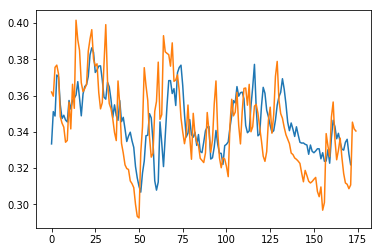

In [34]:
plt.plot(y_predict[3:])
plt.plot(y_test[:,0,0,1])
#plt.plot(x_test[:,:, 0,0,-1])

from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(y_test[3:,0,0,1], y_predict,))
print(np.sqrt(mean_squared_error(y_test[:,0,0,1], y_predict)))
from scipy.stats import pearsonr

print(np.corrcoef(y_test[:,0,0,1, 0], y_predict[:,0]))

In [11]:
y = np.load('observed soil moisture.npy')

In [12]:
y1 = np.load('predicted soil moisture by LSTM model.npy')

In [13]:
y.shape

(175, 3, 2)

In [14]:
y1.shape

(175, 3, 2)

In [43]:
for i in range(3):
    for j in range(2):

        print(r2_score(y[:, i, j], y1[:,i,j]))
        #print(np.sqrt(mean_squared_error(y_test[:,0,i,j], y_pred)))
        #print(np.corrcoef(y_test[:,0,0,0, 0], y_pred[:,0]))

-0.010603326133844737
0.09211046979289239
0.002716131947321121
-1.1050319861910909
-0.05533337387960224
0.0026634946084436173


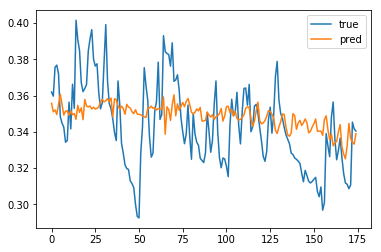

In [20]:
plt.plot(y[:, 0, 1])
plt.plot(y1[:,0,1])
plt.legend(['true','pred'])

In [9]:
def r2(y_true, y_pred):
    
    # y_true: (t,)
    
    return 1-np.sum((y_true-y_pred)**2)/np.sum((np.mean(y_true)-y_true)**2)

In [15]:
for i in range(3):
    for j in range(2):

        print(r2(y[:, i, j], y1[:,i,j]))

-0.010603326133844737
0.09211046979289239
0.002716131947321121
-1.1050319861910909
-0.05533337387960224
0.0026634946084436173


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


import pickle


f = open('100.pickle', 'rb')
a = pickle.load(f)

In [19]:
a.keys()

dict_keys(['x_train', 'x_valid', 'y_train', 'y_valid'])

In [20]:
a['x_train'].shape

(8917, 10, 8, 8, 3)

In [21]:
a['x_valid'].shape

(2233, 10, 8, 8, 3)

In [22]:
a['y_train'].shape

(8917, 1, 8, 8, 1)

In [23]:
a['y_valid'].shape

(2233, 1, 8, 8, 1)